In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor ,DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor ,XGBClassifier
#from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [4]:
df.Owner

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Owner, Length: 301, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


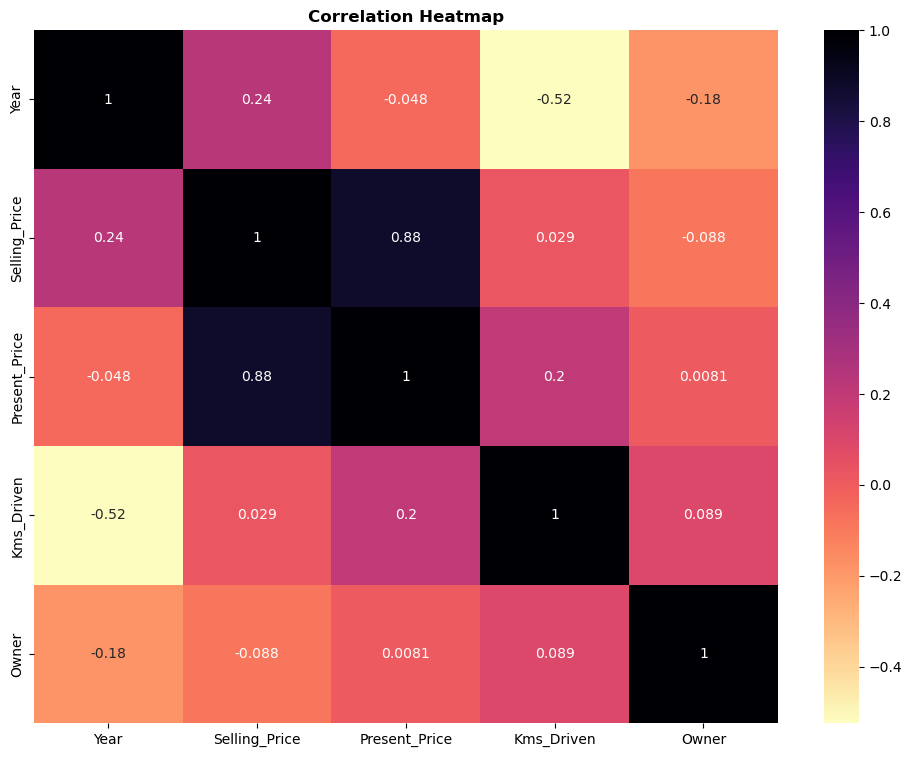

In [8]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), annot = True, cmap = "magma_r" ,)
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

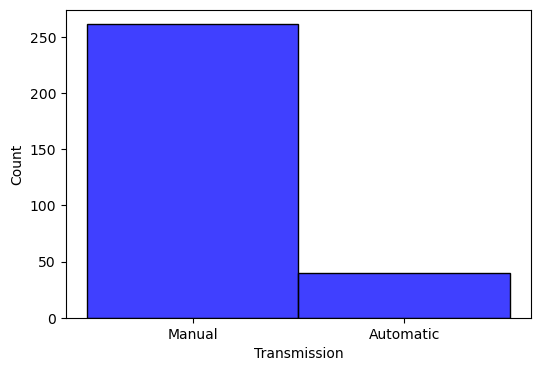

In [9]:
plt.figure(figsize=(6,4));
sns.histplot(df.Transmission, color = "#0000FF")
plt.show()

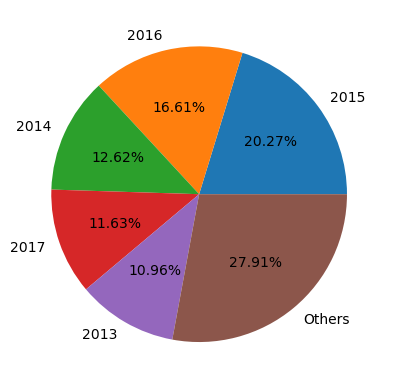

In [10]:
maxcout = df.Year.value_counts()[:5].to_list()
maxes = df.Year.value_counts().index[:5]
maxes = maxes.to_list()
maxes.append("Others")
alls = sum(maxcout)
others = sum(list(df.Year.value_counts())) - alls
maxcout.append(others)
plt.pie(maxcout, labels=maxes, autopct="%0.2f%%")
plt.show()


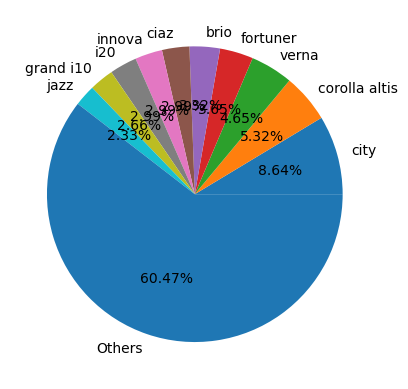

In [11]:
maxcout = df.Car_Name.value_counts()[:10].to_list()
maxes = df.Car_Name.value_counts().index[:10]
maxes = maxes.to_list()
maxes.append("Others")
alls = sum(maxcout)
others = sum(list(df.Car_Name.value_counts())) - alls
maxcout.append(others)
plt.pie(maxcout, labels=maxes, autopct="%0.2f%%")
plt.show()

<BarContainer object of 20 artists>

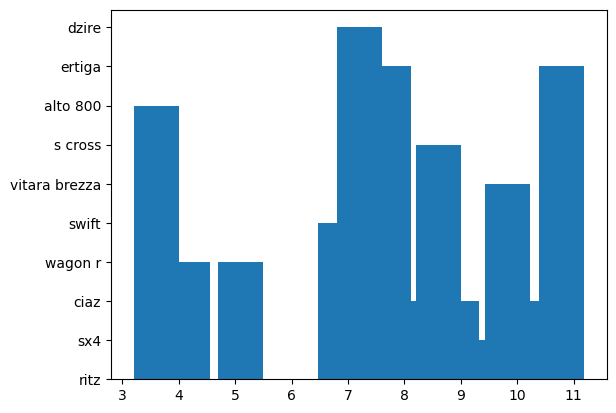

In [12]:
players = df.Present_Price[:20]
overall = df.Car_Name[:20]
plt.bar(players,overall )

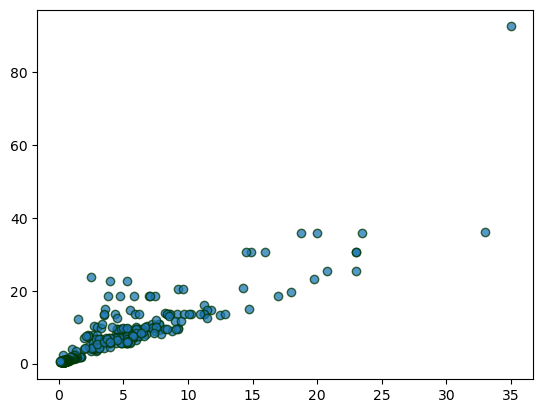

In [13]:
plt.scatter(df.Selling_Price,df.Present_Price,edgecolors='#003703', alpha=0.75)
plt.show()

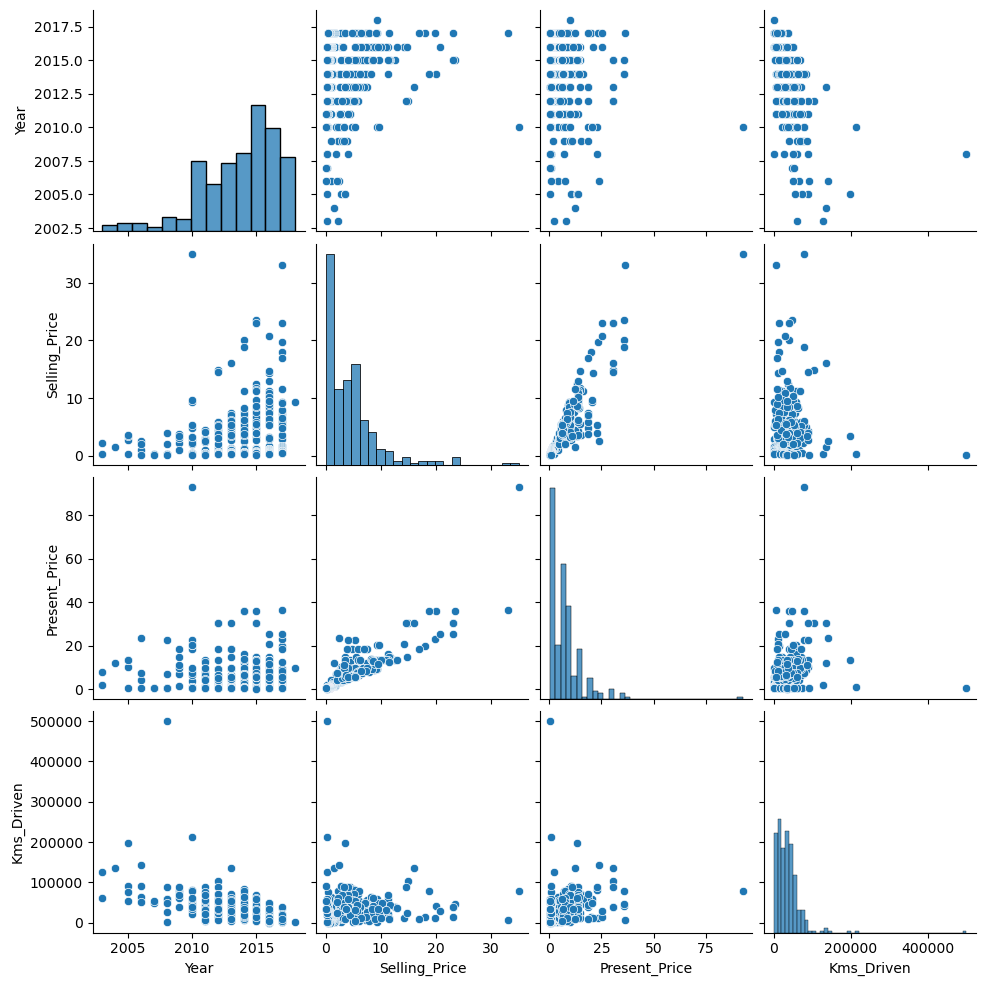

In [115]:
sns.pairplot(df.iloc[:,1:5])


In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
lb = LabelEncoder()

In [16]:
df.Fuel_Type = lb.fit_transform(df.Fuel_Type)
df.Seller_Type = lb.fit_transform(df.Seller_Type)
df.Transmission = lb.fit_transform(df.Transmission)

In [17]:
df['Selling_Price'] = df['Selling_Price'].apply(np.int64)
df['Present_Price'] = df['Present_Price'].apply(np.int64)
df['Fuel_Type'] = df['Fuel_Type'].apply(np.int64)
df['Seller_Type'] = df['Seller_Type'].apply(np.int64)
df['Transmission'] = df['Transmission'].apply(np.int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       301 non-null    object
 1   Year           301 non-null    int64 
 2   Selling_Price  301 non-null    int64 
 3   Present_Price  301 non-null    int64 
 4   Kms_Driven     301 non-null    int64 
 5   Fuel_Type      301 non-null    int64 
 6   Seller_Type    301 non-null    int64 
 7   Transmission   301 non-null    int64 
 8   Owner          301 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 21.3+ KB


In [19]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [53]:
#We create a function that makes it easy for us to train and test any model
def kfolds(model, model_name):
    model = cross_val_score(model, x,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
def model_train(model,model_name):
    model.fit(X_train,Y_train)
    model_train_score = model.score(X_train, Y_train)
    model_test_score = model.score(X_test, Y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")

In [54]:
model = LinearRegression()
model_train(model,'LinearRegression')
kfolds(model,'LinearRegression')

LinearRegression model score on Train= 87.10958749438447%
LinearRegression model score on Test= 85.36309963797588%
LinearRegression score on cross validation: -99.4284793808052%


In [55]:
model_RFR = RandomForestClassifier(n_estimators=100)
model_train(model_RFR,'RandomForestClassifier')
kfolds(model_RFR,'RandomForestClassifier')

RandomForestClassifier model score on Train= 100.0%
RandomForestClassifier model score on Test= 55.26315789473685%
RandomForestClassifier score on cross validation: 59.51612903225806%


In [56]:
model_XG = XGBRegressor()
model_train(model_XG, "XGBRegressor")
kfolds(model_XG, "XGBRegressor")

XGBRegressor model score on Train= 99.99905231715832%
XGBRegressor model score on Test= 90.87728509182543%
XGBRegressor score on cross validation: 61.95234226823103%


In [57]:
model_s = SVC()
model_train(model_s,'SVC')
kfolds(model_s,'SVC')

SVC model score on Train= 28.000000000000004%
SVC model score on Test= 19.736842105263158%
SVC score on cross validation: 24.236559139784948%


In [58]:
model_RFR = DecisionTreeRegressor()
model_train(model_RFR,'DecisionTreeRegressor')
kfolds(model_RFR,'DecisionTreeRegressor')

DecisionTreeRegressor model score on Train= 100.0%
DecisionTreeRegressor model score on Test= 90.1616000345207%
DecisionTreeRegressor score on cross validation: 69.7999050436054%
